<a href="https://colab.research.google.com/github/SSInimgba/Data_Visualizations/blob/master/Oyo_State_Voters_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [0]:
filename = 'OyoState_2015.csv'
pd.set_option('display.max_colwidth', -1)
df2015 = pd.read_csv(filename)

filename = '2011_OyoVoterData.csv'
pd.set_option('display.max_colwidth', -1)
df2011 = pd.read_csv(filename)


In [0]:
df2015 = df2015.dropna(how = 'all')
df2011 = df2011.dropna(how = 'all')

In [0]:
df2015 = df2015.drop(columns=['Unnamed: 0'])
df2015.head(5)

,Local Government,ACCORD #Voters,APC #Voters,LP #Voters,PDP #Voters,SDP #Voters,Total # of Voters,AREA POPULATION(2006 CENSUS),AREA POPULATION(2017 CENSUS),HEADQUARTERS,DATE OFCREATION,TOTAL NOOF WARDS,LANDMASS(KM2)
0,AFIJIO,"Accord-4,590","APC-5,087","LP-3,743","PDP-1,735",SDP-433,NaN,"134,173","185,700",Jobele,1989,10.0,800.000
1,AKINYELE,"Accord-4,509","APC-5, 317","LP-3,842","PDP-3,373",SDP-776,NaN,"211,359","297,600",Moniya,1976,12.0,575.000
2,ATIBA,"Accord-3,734","APC-10,396","LP-7,656","PDP-1,396",SDP-587,NaN,"169,702","236,400",Ofa-Meta,1996,10.0,219.753
3,ATISBO,"Accord-3,257","APC-7,132","LP-2,862","PDP-2,339","SDP-1,156",NaN,"110,792","154,500",Tede,1996,10.0,315.230
4,EGBEDA,"Accord-1,5811","APC-13,495","LP-2,097","PDP-2,625","SDP-2,625",NaN,"319,388","398,500",Egbeda,1989,11.0,410.000


In [0]:
df2011.head(5)

,LOCAL GOVT,ACCORD #Voters,ACN #Voters,PDP #Voters,Total # of Voters,AREA POPULATION(2006 CENSUS),AREA POPULATION(2017 CENSUS),HEADQUARTERS,DATE OFCREATION,TOTAL NOOF WARDS,LANDMASS(KM2)
0,AFIJIO,"4,865","8,471","6,014",NaN,"134,173","185,700",Jobele,1989,10.0,800.000
1,ATIBA,"3,590","18,513","7,565",NaN,"211,359","297,600",Moniya,1976,12.0,575.000
2,ATISBO,"1,935","7,507","6,779",NaN,"169,702","236,400",Ofa-Meta,1996,10.0,219.753
3,IBARAPA NORTH,"3,539","6,602","8,884",NaN,"110,792","154,500",Tede,1996,10.0,315.230
4,IBARAPA EAST,"6,375","6,086","7,950",NaN,"319,388","398,500",Egbeda,1989,11.0,410.000


In [0]:
df2011.rename(columns={"LOCAL GOVT": "Local Government"}, inplace = True)
df2011.columns

Index(['Local Government', 'ACCORD #Voters', 'ACN #Voters', 'PDP #Voters',
       'Total # of Voters', 'AREA POPULATION(2006 CENSUS)',
       'AREA POPULATION(2017 CENSUS)', 'HEADQUARTERS', 'DATE OFCREATION',
       'TOTAL NOOF WARDS', 'LANDMASS(KM2)'],
      dtype='object')

In [0]:
print("2015 columns: ")
print("-----------------------------")
print(df2015.columns)
print("  ")
print("2011 columns: ")
print("---------------------------")
print(df2011.columns)

2015 columns: 
-----------------------------
Index(['Local Government', 'ACCORD #Voters', 'APC #Voters', 'LP #Voters',
       'PDP #Voters', 'SDP #Voters', 'Total # of Voters',
       'AREA POPULATION(2006 CENSUS)', 'AREA POPULATION(2017 CENSUS)',
       'HEADQUARTERS', 'DATE OFCREATION', 'TOTAL NOOF WARDS', 'LANDMASS(KM2)'],
      dtype='object')
  
2011 columns: 
---------------------------
Index(['Local Government', 'ACCORD #Voters', 'ACN #Voters', 'PDP #Voters',
       'Total # of Voters', 'AREA POPULATION(2006 CENSUS)',
       'AREA POPULATION(2017 CENSUS)', 'HEADQUARTERS', 'DATE OFCREATION',
       'TOTAL NOOF WARDS', 'LANDMASS(KM2)'],
      dtype='object')


We can see that they contain similar columns. Therefore we can carry out a comparison analysis

# DATA CLEANING

In [0]:
#Cleaning up the data
#regex is a pain in the butt but pythex.org helps alot!
df2015['ACCORD #Voters'] = df2015['ACCORD #Voters'].replace('Accord-', ' ', regex= True)#removes Accord
df2015['APC #Voters'] = df2015['APC #Voters'].replace('APC-', ' ', regex= True)#removes APC
df2015['LP #Voters'] = df2015['LP #Voters'].replace('LP-', ' ', regex= True)#removes LP
df2015['PDP #Voters']= df2015['PDP #Voters'].replace('PDP-', ' ', regex= True)#removes PDP
df2015['SDP #Voters']= df2015['SDP #Voters'].replace('SDP-', ' ', regex= True)#removes SDP



df2015.head(5)

,Local Government,ACCORD #Voters,APC #Voters,LP #Voters,PDP #Voters,SDP #Voters,Total # of Voters,AREA POPULATION(2006 CENSUS),AREA POPULATION(2017 CENSUS),HEADQUARTERS,DATE OFCREATION,TOTAL NOOF WARDS,LANDMASS(KM2)
0,AFIJIO,"4,590","5,087","3,743","1,735",433,NaN,"134,173","185,700",Jobele,1989,10.0,800.000
1,AKINYELE,"4,509","5, 317","3,842","3,373",776,NaN,"211,359","297,600",Moniya,1976,12.0,575.000
2,ATIBA,"3,734","10,396","7,656","1,396",587,NaN,"169,702","236,400",Ofa-Meta,1996,10.0,219.753
3,ATISBO,"3,257","7,132","2,862","2,339","1,156",NaN,"110,792","154,500",Tede,1996,10.0,315.230
4,EGBEDA,"1,5811","13,495","2,097","2,625","2,625",NaN,"319,388","398,500",Egbeda,1989,11.0,410.000


In [0]:
print("  ")
print("2015: ")
print("-----------------------------")
print(df2015.dtypes)
print("  ")
print("2011: ")
print("---------------------------")
print(df2011.dtypes)

  
2015: 
-----------------------------
Local Government                object 
ACCORD #Voters                  object 
APC #Voters                     object 
LP #Voters                      object 
PDP #Voters                     object 
SDP #Voters                     object 
Total # of Voters               float64
AREA POPULATION(2006 CENSUS)    object 
AREA POPULATION(2017 CENSUS)    object 
HEADQUARTERS                    object 
DATE OFCREATION                 object 
TOTAL NOOF WARDS                float64
LANDMASS(KM2)                   float64
dtype: object
  
2011: 
---------------------------
Local Government                object 
ACCORD #Voters                  object 
ACN #Voters                     object 
PDP #Voters                     object 
Total # of Voters               float64
AREA POPULATION(2006 CENSUS)    object 
AREA POPULATION(2017 CENSUS)    object 
HEADQUARTERS                    object 
DATE OFCREATION                 object 
TOTAL NOOF WARDS            

We can see that columns which should have integer data types are storing them as string objects, so we need to change that

In [0]:
columns = ['ACCORD #Voters', 'APC #Voters', 'LP #Voters',
       'PDP #Voters', 'SDP #Voters','ACN #Voters',
       'AREA POPULATION(2006 CENSUS)', 'AREA POPULATION(2017 CENSUS)',
       'HEADQUARTERS'] #2011 and 2015 columns
columns

['ACCORD #Voters',
 'APC #Voters',
 'LP #Voters',
 'PDP #Voters',
 'SDP #Voters',
 'ACN #Voters',
 'AREA POPULATION(2006 CENSUS)',
 'AREA POPULATION(2017 CENSUS)',
 'HEADQUARTERS']

In [0]:
#Cleaning up the data
#regex is a pain in the b**t but pythex.org helps alot!

for col in columns:
    if col in df2015.columns:
        df2015[col] = df2015[col].str.replace(',','', regex = True)
        df2015[col] = df2015[col].str.replace(' ','', regex = True)
        df2015[col] = df2015[col].str.strip()
    if col in df2011.columns:
        df2011[col] = df2011[col].replace(',','',regex= True)
        df2011[col] = df2011[col].replace('','0',regex= True)
        

In [0]:
df2011.iloc[32,1:4] = df2011.iloc[32,1:4].replace('AWAITING',0) #fix a row in the 2011 dataset

In [0]:
columns = ['ACCORD #Voters','ACN #Voters', 'APC #Voters','LP #Voters', 'PDP #Voters', 'SDP #Voters',
       'AREA POPULATION(2006 CENSUS)', 'AREA POPULATION(2017 CENSUS)','TOTAL NOOF WARDS']

for col in columns:
    if col in df2015.columns:
        df2015[col] = df2015[col].astype(int)
    if col in df2011.columns:
        df2011[col] = df2011[col].astype(int)
    
print("2015 columns: ")
print("-----------------------------")
print(df2015.dtypes)
print("  ")
print("2011 columns: ")
print("---------------------------")
print(df2011.dtypes)

2015 columns: 
-----------------------------
Local Government                object 
ACCORD #Voters                  int64  
APC #Voters                     int64  
LP #Voters                      int64  
PDP #Voters                     int64  
SDP #Voters                     int64  
Total # of Voters               float64
AREA POPULATION(2006 CENSUS)    int64  
AREA POPULATION(2017 CENSUS)    int64  
HEADQUARTERS                    object 
DATE OFCREATION                 object 
TOTAL NOOF WARDS                int64  
LANDMASS(KM2)                   float64
dtype: object
  
2011 columns: 
---------------------------
Local Government                object 
ACCORD #Voters                  int64  
ACN #Voters                     int64  
PDP #Voters                     int64  
Total # of Voters               float64
AREA POPULATION(2006 CENSUS)    int64  
AREA POPULATION(2017 CENSUS)    int64  
HEADQUARTERS                    object 
DATE OFCREATION                 object 
TOTAL NOOF WARD

## Calculate the Total number of Voters

In [0]:

df2015['Total # of Voters'] = df2015['ACCORD #Voters'] + df2015['APC #Voters'] + df2015['LP #Voters'] + df2015['PDP #Voters']+ df2015['SDP #Voters']

df2015.head(5)

,Local Government,ACCORD #Voters,APC #Voters,LP #Voters,PDP #Voters,SDP #Voters,Total # of Voters,AREA POPULATION(2006 CENSUS),AREA POPULATION(2017 CENSUS),HEADQUARTERS,DATE OFCREATION,TOTAL NOOF WARDS,LANDMASS(KM2)
0,AFIJIO,4590,5087,3743,1735,433,15588,134173,185700,Jobele,1989,10,800.000
1,AKINYELE,4509,5317,3842,3373,776,17817,211359,297600,Moniya,1976,12,575.000
2,ATIBA,3734,10396,7656,1396,587,23769,169702,236400,Ofa-Meta,1996,10,219.753
3,ATISBO,3257,7132,2862,2339,1156,16746,110792,154500,Tede,1996,10,315.230
4,EGBEDA,15811,13495,2097,2625,2625,36653,319388,398500,Egbeda,1989,11,410.000


In [0]:
df2011['Total # of Voters'] = df2011['ACCORD #Voters'] + df2011['ACN #Voters'] + df2011['PDP #Voters']
df2011.head(5)

,Local Government,ACCORD #Voters,ACN #Voters,PDP #Voters,Total # of Voters,AREA POPULATION(2006 CENSUS),AREA POPULATION(2017 CENSUS),HEADQUARTERS,DATE OFCREATION,TOTAL NOOF WARDS,LANDMASS(KM2)
0,AFIJIO,4865,8471,6014,19350,134173,185700,Jobele,1989,10,800.000
1,ATIBA,3590,18513,7565,29668,211359,297600,Moniya,1976,12,575.000
2,ATISBO,1935,7507,6779,16221,169702,236400,Ofa-Meta,1996,10,219.753
3,IBARAPA NORTH,3539,6602,8884,19025,110792,154500,Tede,1996,10,315.230
4,IBARAPA EAST,6375,6086,7950,20411,319388,398500,Egbeda,1989,11,410.000


# DATA PREPROCESSING

In [0]:
print(len(df2011['Local Government'].unique()))
df2011['Local Government'].unique()

33


array(['AFIJIO', 'ATIBA', 'ATISBO', 'IBARAPA NORTH', 'IBARAPA EAST',
       'IBARAPA CENTRAL', 'OLUYOLE', 'SAKI EAST', 'SAKI WEST', 'ORELOPE',
       'ORIRE', 'IBADAN NORTH', 'IDO', 'OYO EAST', 'OYO WEST',
       'IBADAN NORTH/EAST', 'ITESIWAJU', 'ISEYIN', 'OGBOMOSO SOUTH',
       'LAGELU', 'KAJOLA', 'AKINYELE', 'IREPO', 'OLORUNSOGO', 'SURULERE',
       'OGO OLUWA', 'ONA ARA', 'IBADAN NORTH/WEST', 'IBADAN SOUTH-EAST',
       'IWAJOWA', 'EGBEDA', 'OGBOMOSO NORTH', 'IBADAN SOUTH-WEST'],
      dtype=object)

In [0]:
print(len(df2015['Local Government'].unique()))
df2015['Local Government'].unique()

33


array(['AFIJIO', 'AKINYELE', 'ATIBA', 'ATISBO', 'EGBEDA', 'IBADAN NORTH',
       'IBADAN NORTH EAST', 'IBADAN NORTH WEST', 'IBADAN SOUTH EAST',
       'IBADAN SOUTH WEST', 'IBARAPA CENTRAL', 'IBARAPA EAST',
       'IBARAPA NORTH', 'IDO', 'IREPO', 'ISEYIN', 'ITESIWAJU', 'IWAJOWA',
       'KAJOLA', 'LAGELU', 'OGBOMOSO NORTH', 'OGBOMOSO SOUTH',
       'OGO OLUWA', 'OLORUNSOGO', 'OLUYOLE', 'ONA ARA', 'OORELOPE',
       'ORIIRE', 'OYO EAST', 'OYO WEST', 'SAKI EAST', 'SAKI WEST',
       'SURULERE'], dtype=object)

## Creating Geo-Zones

In [0]:
central_values = ['AFIJIO', 'AKINYELE', 'EGBEDA',
                  'OGO OLUWA','SURULERE','LAGELU',
                  'OLUYOLE','ONA ARA', 'OYO EAST', 'OYO WEST','ATIBA']


northern_values = ['SAKI EAST', 'SAKI WEST','ATISBO',
                   'IREPO','OLORUNSOGO', 'KAJOLA', 'IWAJOWA',
                  'OGBOMOSO NORTH', 'OGBOMOSO SOUTH',
                   'ISEYIN','OORELOPE','ORIIRE','ITESIWAJU']

southern_values = ['IBADAN NORTH','IBADAN NORTH EAST', 
                   'IBADAN NORTH WEST', 'IBADAN SOUTH EAST','IBADAN SOUTH WEST', 
                   'IBARAPA CENTRAL', 'IBARAPA EAST','IBARAPA NORTH', 'IDO']




In [0]:
zone1 = ['EGBEDA', 'IBADAN NORTH', 'AKINYELE','IBADAN NORTH EAST', 
                   'IBADAN NORTH WEST', 'IBADAN SOUTH EAST','IBADAN SOUTH WEST','IDO','LAGELU','OLUYOLE','ONA ARA']

zone2 = ['ATISBO','OORELOPE','ISEYIN','ITESIWAJU', 
         'KAJOLA',  'IREPO','OLORUNSOGO','IWAJOWA','SAKI EAST', 'SAKI WEST']
zone3 = ['OGBOMOSO NORTH', 'OGBOMOSO SOUTH','OGO OLUWA','SURULERE','ORIIRE']

zone4 = ['AFIJIO','OYO EAST', 'OYO WEST','ATIBA']

zone5 = ['IBARAPA CENTRAL', 'IBARAPA EAST','IBARAPA NORTH']

In [0]:
conditions1 = [(df2015['Local Government'].isin(zone1)),
               (df2015['Local Government'].isin(zone2)),
                (df2015['Local Government'].isin(zone3)),
             (df2015['Local Government'].isin(zone4)),
               (df2015['Local Government'].isin(zone5))]

choices1 = ['zoneI','zoneII','zoneIII','zoneIV','zoneV']
df2015['Geo_Zone'] = np.select(conditions1,choices1,default = 'None')
df2011['Geo_Zone'] = np.select(conditions1,choices1,default = 'None')


In [0]:
conditions = [(df2015['Local Government'].isin(central_values)),
               (df2015['Local Government'].isin(northern_values)),
                (df2015['Local Government'].isin(southern_values))]
      
choices = ['Central', 'North','South']
df2015['Oyo Zone'] = np.select(conditions, choices, default = 'None')
df2011['Oyo Zone'] = np.select(conditions, choices, default = 'None')

In [0]:
df2015.head(5)

,Local Government,ACCORD #Voters,APC #Voters,LP #Voters,PDP #Voters,SDP #Voters,Total # of Voters,AREA POPULATION(2006 CENSUS),AREA POPULATION(2017 CENSUS),HEADQUARTERS,DATE OFCREATION,TOTAL NOOF WARDS,LANDMASS(KM2),Geo_Zone,Oyo Zone
0,AFIJIO,4590,5087,3743,1735,433,15588,134173,185700,Jobele,1989,10,800.000,zoneIV,Central
1,AKINYELE,4509,5317,3842,3373,776,17817,211359,297600,Moniya,1976,12,575.000,zoneI,Central
2,ATIBA,3734,10396,7656,1396,587,23769,169702,236400,Ofa-Meta,1996,10,219.753,zoneIV,Central
3,ATISBO,3257,7132,2862,2339,1156,16746,110792,154500,Tede,1996,10,315.230,zoneII,North
4,EGBEDA,15811,13495,2097,2625,2625,36653,319388,398500,Egbeda,1989,11,410.000,zoneI,Central


In [0]:
df2011.head(5)

,Local Government,ACCORD #Voters,ACN #Voters,PDP #Voters,Total # of Voters,AREA POPULATION(2006 CENSUS),AREA POPULATION(2017 CENSUS),HEADQUARTERS,DATE OFCREATION,TOTAL NOOF WARDS,LANDMASS(KM2),Geo_Zone,Oyo Zone
0,AFIJIO,4865,8471,6014,19350,134173,185700,Jobele,1989,10,800.000,zoneIV,Central
1,ATIBA,3590,18513,7565,29668,211359,297600,Moniya,1976,12,575.000,zoneI,Central
2,ATISBO,1935,7507,6779,16221,169702,236400,Ofa-Meta,1996,10,219.753,zoneIV,Central
3,IBARAPA NORTH,3539,6602,8884,19025,110792,154500,Tede,1996,10,315.230,zoneII,North
4,IBARAPA EAST,6375,6086,7950,20411,319388,398500,Egbeda,1989,11,410.000,zoneI,Central


# DATA VISUALIZATIONS

In [0]:
v = {'2011': [df2011['Total # of Voters'].sum()], '2015': [df2015['Total # of Voters'].sum()]}
voters = pd.DataFrame(v)
voters

,2011,2015
0,999026,881743


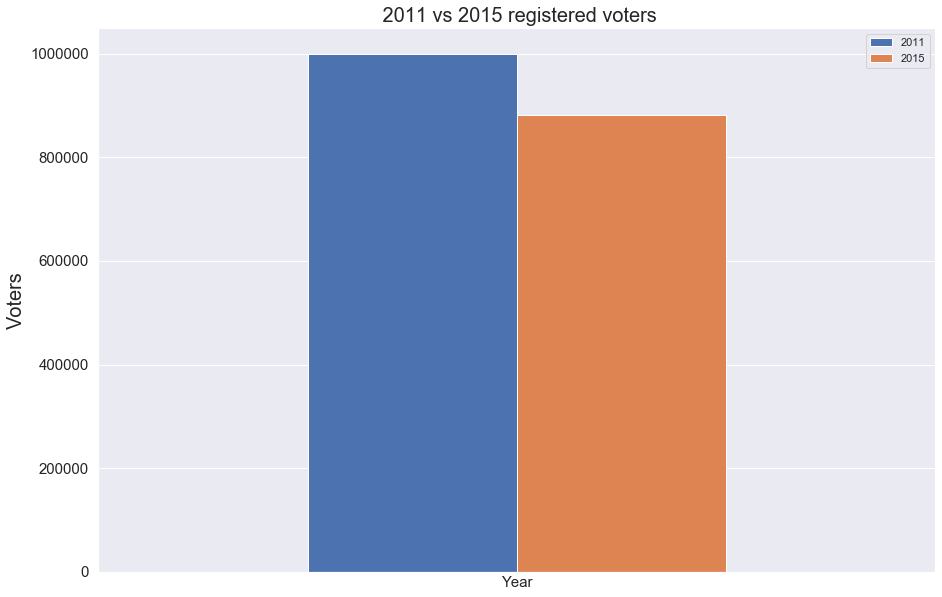

In [0]:
voters[['2011','2015']].plot(kind='bar', figsize = (15,10) );
plt.xlabel('Year', fontsize = 15  );
#plt.xticks(rotation = 0, fontsize = 15);
plt.xticks([], [])
plt.yticks(fontsize = 15);
plt.title(" 2011 vs 2015 registered voters", fontsize = 20);
plt.ylabel('Voters', fontsize = 20);
plt.show();

Seems that more voters were registered in 2011 than in 2015

In [0]:
def gen_colors(df):
    y = ['ACCORD #Voters','APC #Voters', 'magenta', 'ACN #Voters','PDP #Voters','LP #Voters','SDP #Voters']
    col_d = {'ACCORD #Voters': 'yellow',
             'ACN #Voters': 'black',
             'PDP #Voters':'green',
             'APC #Voters': 'red',
             'LP #Voters': 'magenta',
             'SDP #Voters': 'blue'}
    return [col_d[col] for col in df.columns if col in y]

gen_colors(df2015)

['yellow', 'red', 'magenta', 'green', 'blue']

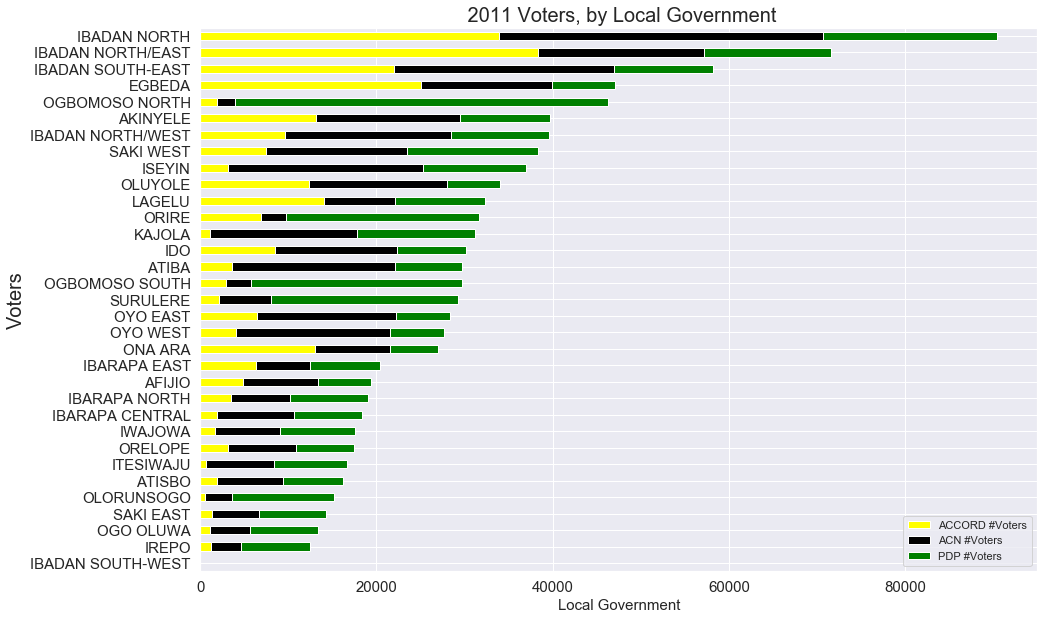

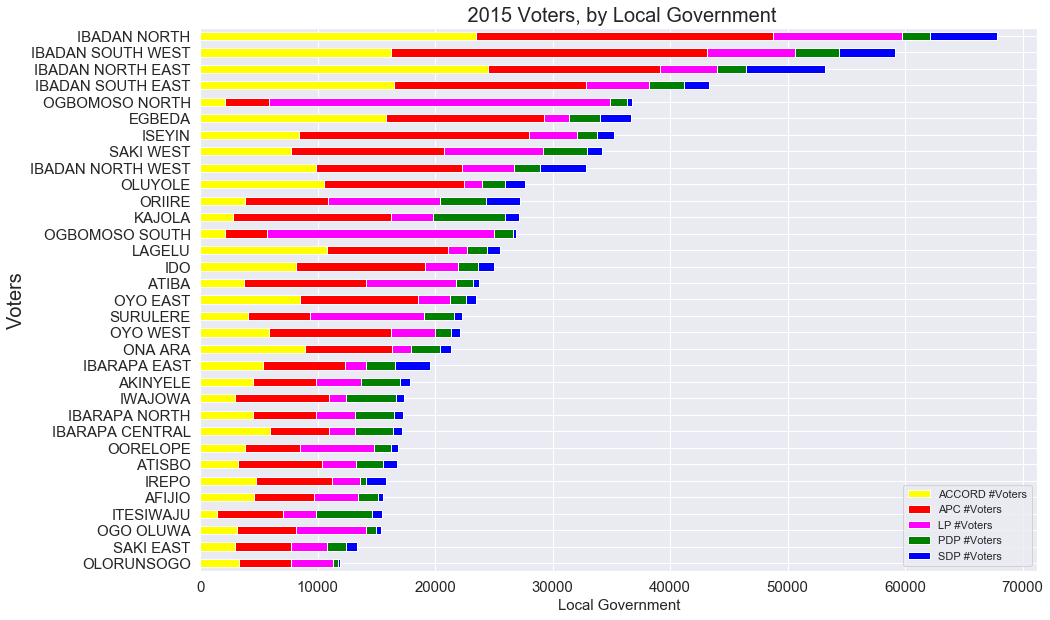

In [0]:
df2011.sort_values('Total # of Voters', ascending=True).plot( kind = 'barh', x = 'Local Government', y = ['ACCORD #Voters', 'ACN #Voters',
                                                'PDP #Voters'], figsize =(15,10), stacked = True, color=gen_colors(df2011));
plt.xlabel('Local Government', fontsize = 15  );
plt.xticks(rotation = 0, fontsize = 15);
plt.yticks(fontsize = 15);
plt.title(" 2011 Voters, by Local Government", fontsize = 20);
plt.ylabel('Voters', fontsize = 20);
plt.show();


df2015.sort_values('Total # of Voters', ascending=True).plot( kind = 'barh', x = 'Local Government', 
                                                             y = ['ACCORD #Voters','APC #Voters','LP #Voters','PDP #Voters','SDP #Voters'], figsize =(15,10), stacked = True, color=gen_colors(df2015));
plt.xlabel('Local Government', fontsize = 15  );
plt.xticks(rotation = 0, fontsize = 15);
plt.yticks(fontsize = 15);
plt.title(" 2015 Voters, by Local Government", fontsize = 20);
plt.ylabel('Voters', fontsize = 20);
plt.show();



- 2015 saw the emergence of Labour Party, APC, and SDP.
- For both years, the local gorvernements that have the highest number of registered voters are Ibadan(N,SW*,NE,SE), Egbeda and Ogbomoso North
- We can also propose that some of the 2011 PDP and ACN voters ported to APC, LP, ACCORD and SDP


In [0]:
df2011zones = df2011.groupby('Oyo Zone')[['ACCORD #Voters', 'ACN #Voters', 'PDP #Voters','Total # of Voters']].sum()
df2011zones

,ACCORD #Voters,ACN #Voters,PDP #Voters,Total # of Voters
Oyo Zone,,,,
Central,58882,94929,95002,248813
North,116882,156003,174383,447268
South,81951,122540,98454,302945


In [0]:
df2015zones = df2015.groupby('Oyo Zone')[['ACCORD #Voters', 'APC #Voters', 'LP #Voters',
       'PDP #Voters', 'SDP #Voters','Total # of Voters']].sum()
df2015zones

,ACCORD #Voters,APC #Voters,LP #Voters,PDP #Voters,SDP #Voters,Total # of Voters
Oyo Zone,,,,,,
Central,80411,94588,44258,21602,10603,251462
North,49475,101586,96346,33931,13499,294837
South,114440,124086,43205,24381,29332,335444


In [0]:
df2015geozones = df2015.groupby('Geo_Zone')[['ACCORD #Voters', 'APC #Voters', 'LP #Voters',
       'PDP #Voters', 'SDP #Voters','Total # of Voters']].sum()
df2015geozones

,ACCORD #Voters,APC #Voters,LP #Voters,PDP #Voters,SDP #Voters,Total # of Voters
Geo_Zone,,,,,,
zoneI,149156,155157,46637,27549,31764,410263
zoneII,41391,87254,38442,26856,10095,204038
zoneIII,15305,24628,73553,10498,4457,128441
zoneIV,22661,35857,17935,5940,2495,84888
zoneV,15813,17364,7242,9071,4623,54113


In [0]:
df2011geozones = df2011.groupby('Geo_Zone')[['ACCORD #Voters', 'ACN #Voters','PDP #Voters','Total # of Voters']].sum()
df2011geozones

,ACCORD #Voters,ACN #Voters,PDP #Voters,Total # of Voters
Geo_Zone,,,,
zoneI,59930,112247,103587,275764
zoneII,93148,104078,139669,336895
zoneIII,24976,55298,42588,122862
zoneIV,30403,48390,32538,111331
zoneV,49258,53459,49457,152174


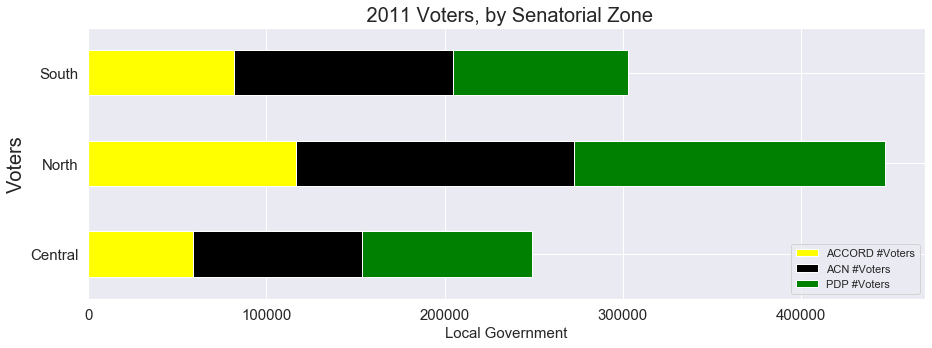

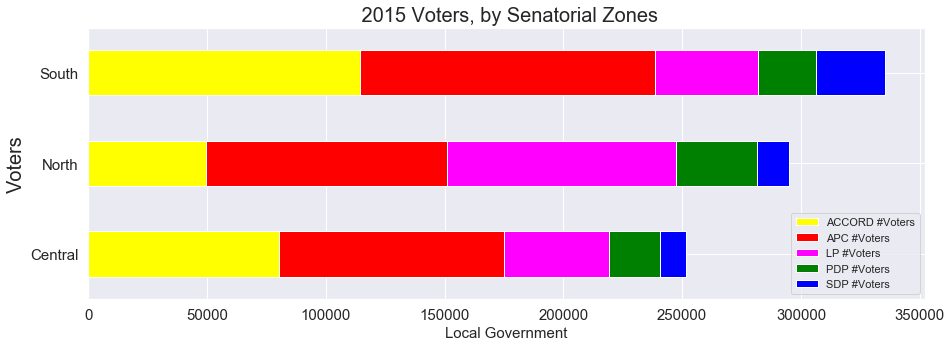

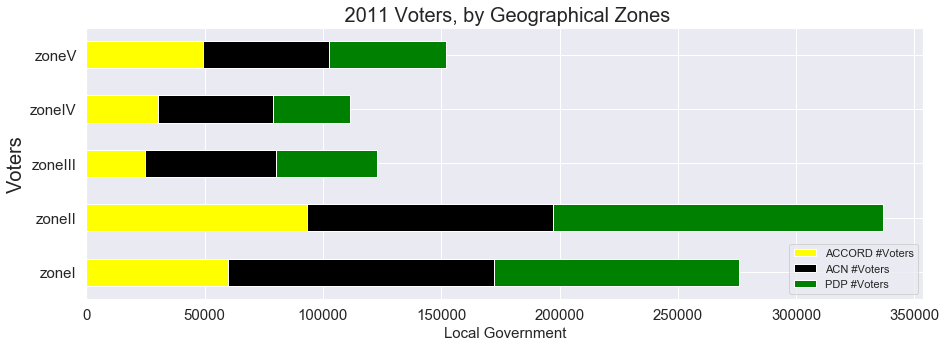

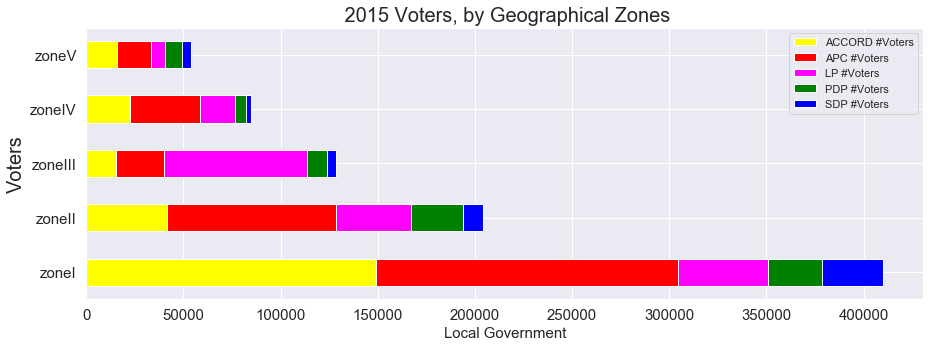

In [0]:


df2011zones.plot( kind = 'barh', y = ['ACCORD #Voters', 'ACN #Voters','PDP #Voters'],
                 color=gen_colors(df2011), figsize =(15,5), stacked = True);
#color = ['blue','violet','red'] color = ['blue','green','yellow','red','orange']
plt.xlabel('Local Government', fontsize = 15  );
plt.xticks(rotation = 0, fontsize = 15);
plt.yticks(fontsize = 15);
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title(" 2011 Voters, by Senatorial Zone", fontsize = 20);
plt.ylabel('Voters', fontsize = 20);
plt.show();

df2015zones.plot( kind = 'barh', y = ['ACCORD #Voters', 'APC #Voters', 'LP #Voters',
       'PDP #Voters', 'SDP #Voters'],color=gen_colors(df2015)
             , figsize =(15,5), stacked = True);
plt.xlabel('Local Government', fontsize = 15  );
plt.xticks(rotation = 0, fontsize = 15);
plt.yticks(fontsize = 15);
plt.title(" 2015 Voters, by Senatorial Zones", fontsize = 20);
plt.ylabel('Voters', fontsize = 20);
plt.show();


df2011geozones.plot( kind = 'barh', y = ['ACCORD #Voters', 'ACN #Voters','PDP #Voters'],
                color=gen_colors(df2011), figsize =(15,5), stacked = True);
plt.xlabel('Local Government', fontsize = 15  );
plt.xticks(rotation = 0, fontsize = 15);
plt.yticks(fontsize = 15);
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.title(" 2011 Voters, by Geographical Zones", fontsize = 20);
plt.ylabel('Voters', fontsize = 20);
plt.show();

df2015geozones.plot( kind = 'barh', y = ['ACCORD #Voters', 'APC #Voters', 'LP #Voters',
       'PDP #Voters', 'SDP #Voters'],color=gen_colors(df2015), figsize =(15,5), stacked = True);
plt.xlabel('Local Government', fontsize = 15  );
plt.xticks(rotation = 0, fontsize = 15);
plt.yticks(fontsize = 15);
plt.title(" 2015 Voters, by Geographical Zones", fontsize = 20);
plt.ylabel('Voters', fontsize = 20);
plt.show();





                            
The 2011 voter pattern grouped by Senatorial Zones shows:


                            - Southern zones votes are split between ACCORD and ACN
                            - Northern zones voted PDP more than any other zone
                            - Central zones voted ACN more than anyother party
                            
                            
2015 voter pattern grouped by Senatorial Zones shows shows:


                            - Southern Zones are split between Accord and APC
                            - Northern Zones are split between APC and LP
                            - Central Zones voted APC more than any other party
                            - Northern Zone had the higest PDP voters
                            
                             
 2011 Voters grouped by Geo Zones:
 
                            - Zone 1 was split between Accord and ACN
                            - Zone 2 was split between ACN and PDP
                            - Zone 3 was PDP
                            - Zone 4 was ACN 
                            - Zone 5 PDP
 
 
2015 Voters grouped Geo Zones: 

                            - Zone 1 was split between Accord and APC
                            - Zone 2 was APC
                            - Zone 3 was Labour party
                            - Zone 4 was APC
                            - Zone 5 was split between Accord and APC 